In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import seaborn as sns

In [200]:
#Importamos el archivo csv y elegimos la columna index que sera 'Name'
df=pd.read_csv('Pokemon.csv')

# Organizando Dataframe*

In [201]:
#Eliminamos la columna #
df=df.drop('#',axis=1)

In [202]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# LIMPIEZA DEL DATAFRAME*
para evitar futuros conflictos resolveremos los siguientes casos:
-verificaremos el tipo de dato de cada columna
-Todo estara en mayuscula para evitar errores de digitación
-Eliminaremos espacios al principio y finally
-Modificaremos errores del dataframe

In [203]:
#Obersavmos que en la columna 'Type2' hay datos con valor NaN entonces vamos a repetir la columna TYPE 1 al TYPE 2
condicion = df['Type 2'].isna()
df.loc[condicion, 'Type 2'] = df.loc[condicion, 'Type 1']

In [204]:
# CORRIGIENDO ERRORES DE LEGENDARIOS
df.loc[df['Name'] == 'MEW', 'Legendary'] = True
# Para CELEBI
df.loc[df['Name'] == 'CELEBI', 'Legendary'] = True
# Para MANAPHY
df.loc[df['Name'] == 'MANAPHY', 'Legendary'] = True

df.loc[df['Name'] == 'MANAPHY', 'Legendary'] = True
df.loc[df['Name'] == 'MELOETTAARIA FORME', 'Legendary'] = True
df.loc[df['Name'] == 'MELOETTAPIROUETTE FORME', 'Legendary'] = True
df.loc[df['Name'] == 'GENESECT', 'Legendary'] = True
df.loc[df['Name'] == 'KELDEOORDINARY FORME', 'Legendary'] = True   
df.loc[df['Name'] == 'KELDEORESOLUTE FORME', 'Legendary'] = True

In [205]:
# TODO ESTA EN ORDEN
df = df.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    object
 4   HP          800 non-null    object
 5   Attack      800 non-null    object
 6   Defense     800 non-null    object
 7   Sp. Atk     800 non-null    object
 8   Sp. Def     800 non-null    object
 9   Speed       800 non-null    object
 10  Generation  800 non-null    object
 11  Legendary   800 non-null    object
dtypes: object(12)
memory usage: 75.1+ KB


In [206]:
df = df.map(lambda x: x.upper() )
df=df.map(lambda x:x.strip() )

In [207]:
#convertimos los valores a numericos de nuevo
df['Total']=df['Total'].astype(int)
df['HP']=df['HP'].astype(int)
df['Attack']=df['Attack'].astype(int)
df['Defense']= df['Defense'].astype(int)
df['Sp. Atk']=df['Sp. Atk'].astype(int)
df['Sp. Def']=df['Sp. Def'].astype(int)
df['Speed']=df['Speed'].astype(int)
df['Generation']=df['Generation'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int32 
 4   HP          800 non-null    int32 
 5   Attack      800 non-null    int32 
 6   Defense     800 non-null    int32 
 7   Sp. Atk     800 non-null    int32 
 8   Sp. Def     800 non-null    int32 
 9   Speed       800 non-null    int32 
 10  Generation  800 non-null    int32 
 11  Legendary   800 non-null    object
dtypes: int32(8), object(4)
memory usage: 50.1+ KB


# GRAFICOS 

# PORCENTAJE DE CANTIDAD DE TIPOS DE POKEMONS

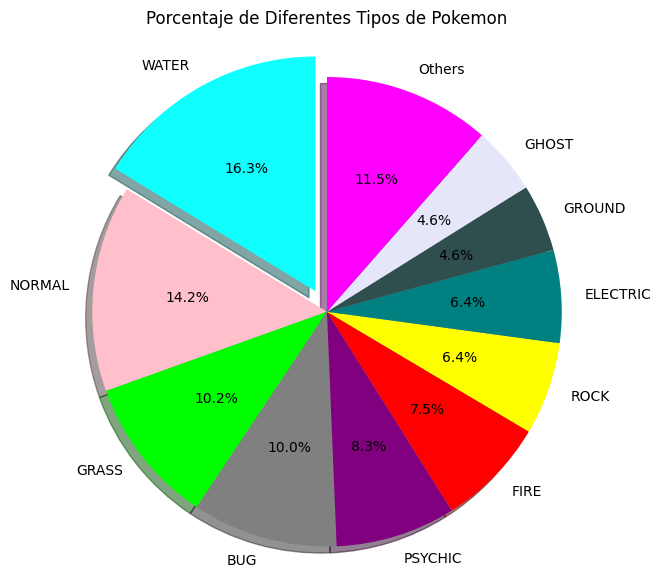

In [208]:
cantidadQuery='SELECT  COUNT ("Type 1") as Cantidad,"Type 1"  FROM df  group by "Type 1" ORDER BY Cantidad DESC '
cantidadTipos=ps.sqldf(cantidadQuery)
colores = ['#0fffff', '#FFC0CB', '#00ff00', '#808080', '#800080', '#FF0000', '#FFFF00', '#008080', '#2F4F4F','#E6E6FA','#FF00FF']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0,0,0) 
sizes = cantidadTipos["Cantidad"].head(10).tolist() + [79]
labels = cantidadTipos["Type 1"].head(10).tolist() + ["Others"]
plt.pie(sizes, explode=explode, labels=labels, colors=colores,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Porcentaje de Diferentes Tipos de Pokemon") #Titulo del gráfico
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()#Muestra el gráfico


# GRAFICA DE COMPARACIÓN ENTRE TIPOS FUEGO Y AGUA

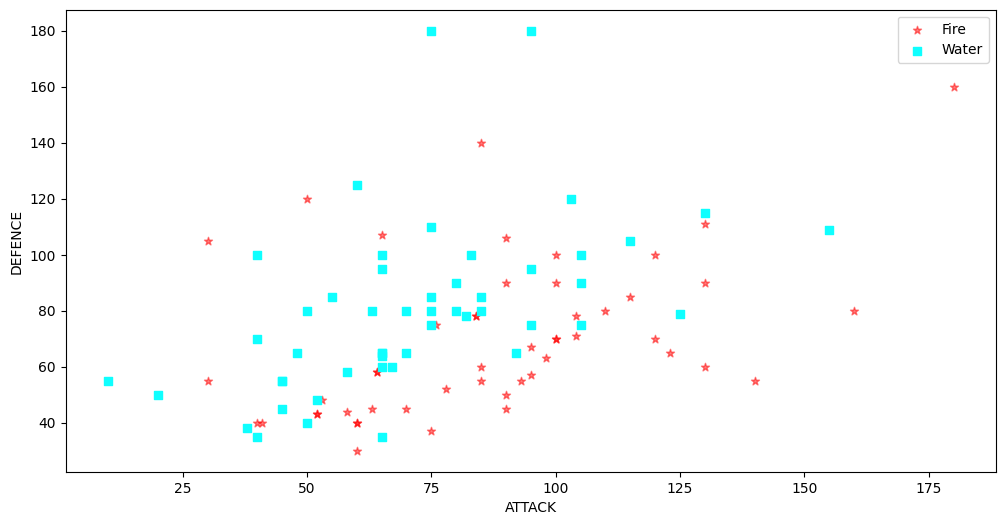

In [209]:
QueryFire='SELECT "Name","Type 1","Type 2","Attack" ,"Defense" FROM df WHERE "Type 1" = \'FIRE\' OR"Type 2" = \'FIRE\''
QueryWater='SELECT "Name","Type 1","Type 2","Attack" ,"Defense" FROM df WHERE "Type 1" = \'WATER\' OR "Type 2" = \'WATER\''
FIREVS=ps.sqldf(QueryFire)
WATERVS=ps.sqldf(QueryWater)
#LLAMANDO A SCATTER PARA EL VERSUS
plt.scatter(FIREVS['Attack'].head(50),FIREVS['Defense'].head(50),color='#FF0000',label='Fire',alpha=0.5,marker='*') 
plt.scatter(WATERVS['Attack'].head(50),WATERVS['Defense'].head(50),color='#0fffff',label="Water",marker='s')
plt.xlabel("ATTACK")
plt.ylabel("DEFENCE")
plt.legend()
plt.plot()
fig=plt.gcf()  #obtenemos la figura usando.gcf()
fig.set_size_inches(12,6) #establecer el tamaño de la figura en 12 pulgadas de ancho y 6 pulgadas de altura.
plt.show()

# TOP 10 POKEMONS MAS FUERTES 

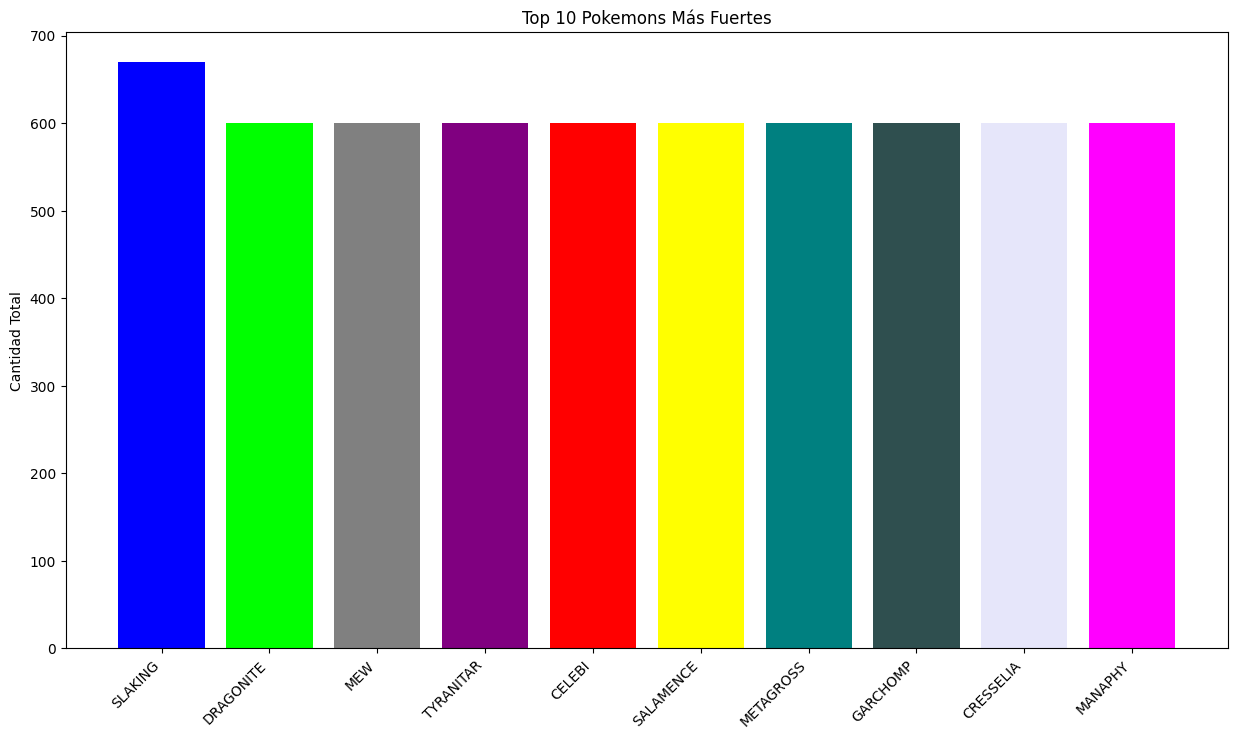

In [210]:
#Nota:Debemos Convertir las columnas a trabajar a valores numéricos
sql_query = 'SELECT * FROM df WHERE Name NOT LIKE "%MEGA%" AND Legendary LIKE "%FALSE%" ORDER BY Total DESC'
TopFuertes = ps.sqldf(sql_query)
TopFuertes['Total']= TopFuertes['Total'].astype(int)
fig, ax = plt.subplots()
bar_colors = ['#0000FF', '#00ff00', '#808080', '#800080', '#FF0000', '#FFFF00', '#008080', '#2F4F4F', '#E6E6FA', '#FF00FF']
ax.bar(TopFuertes['Name'].head(10), TopFuertes['Total'].head(10), color=bar_colors)
ax.set_ylabel('Cantidad Total')  # Nombre del eje Y
ax.set_title('Top 10 Pokemons Más Fuertes')  # Título
ax.set_xticks(range(10))  # Establecer las posiciones de las etiquetas
ax.set_xticklabels(TopFuertes['Name'].head(10), rotation=45, ha='right')  # Establecer las etiquetas y rotación
fig.set_size_inches(15, 8)
plt.show()


# TOTAL DE ATAQUES POR TIPO DE POKEMON

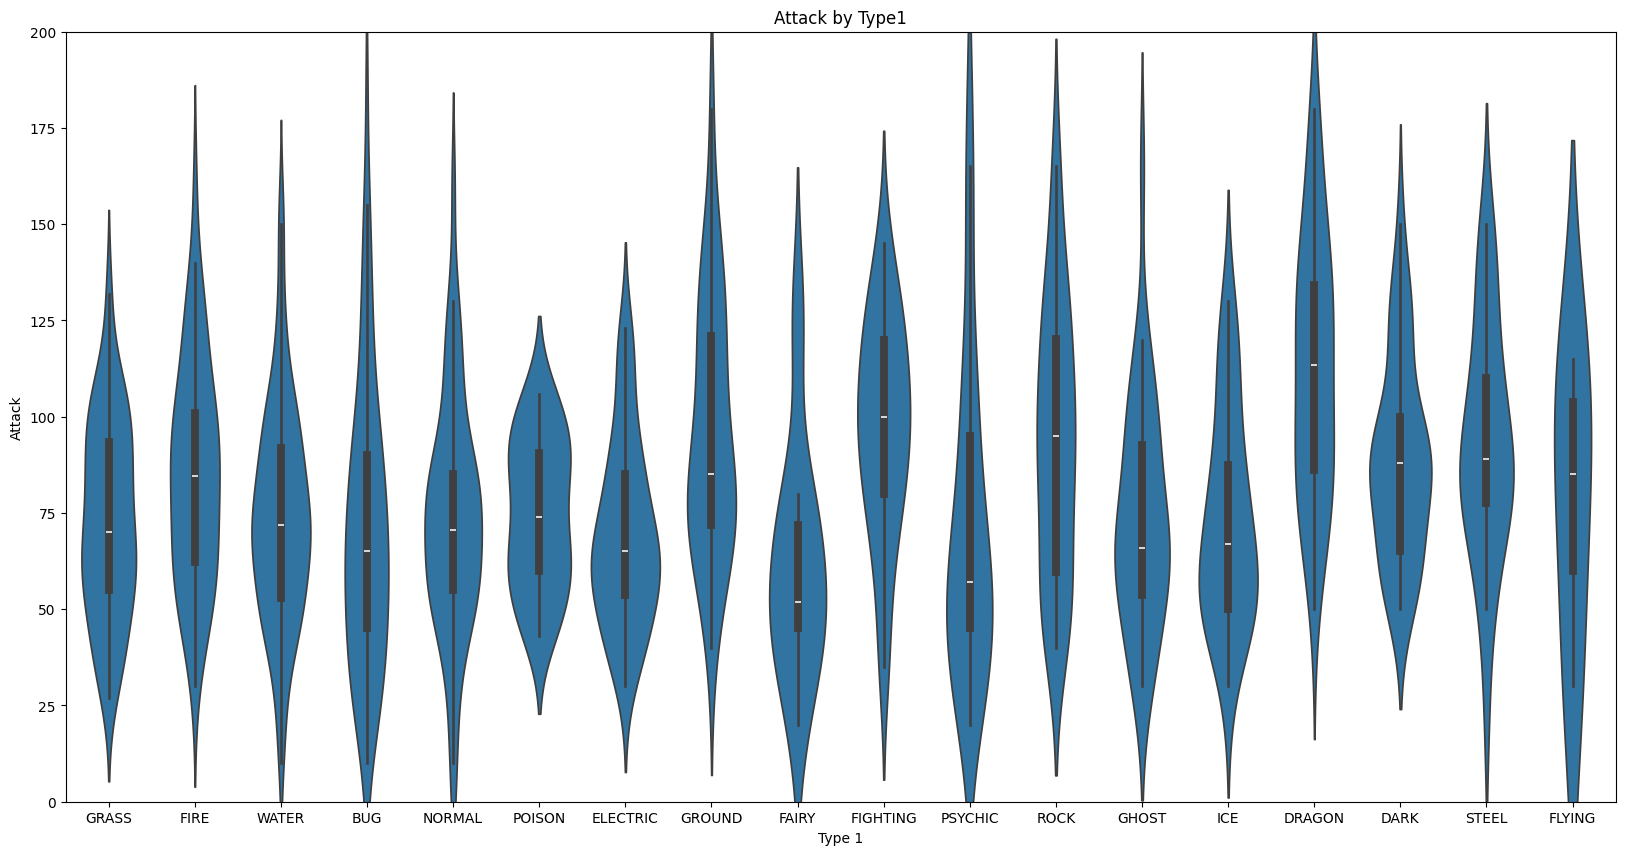

In [211]:
plt.subplots(figsize = (20,10))
plt.title('Attack by Type1')
sns.violinplot(x = "Type 1", y = "Attack",data = df)
plt.ylim(0,200)
plt.show()

# ESTADÍSTICAS TOTALES POR GENERACIÓN

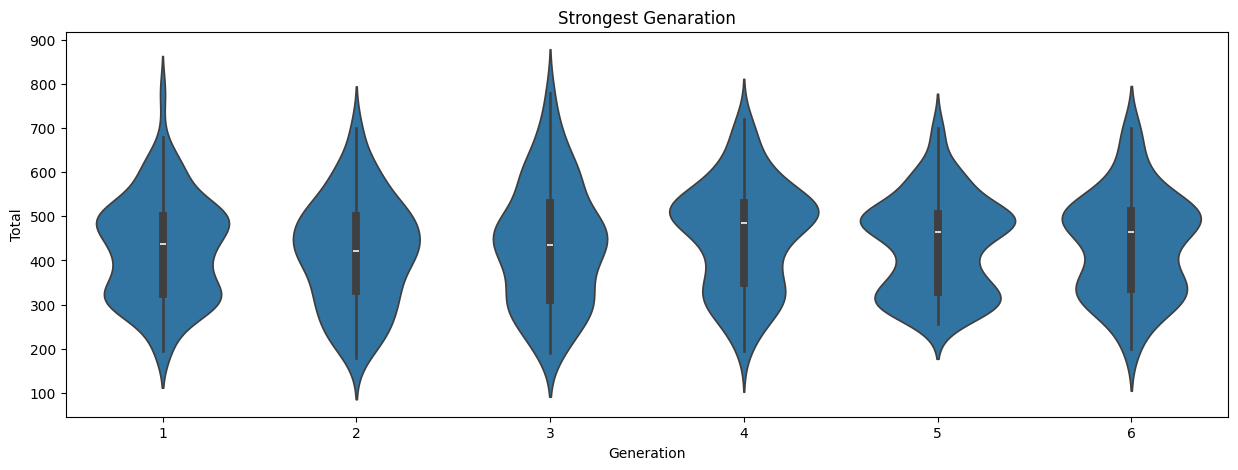

In [212]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "Generation", y = "Total",data = df)
plt.show()

# CANTIDAD DE POKEMON LEGENDARIOS POR TIPO

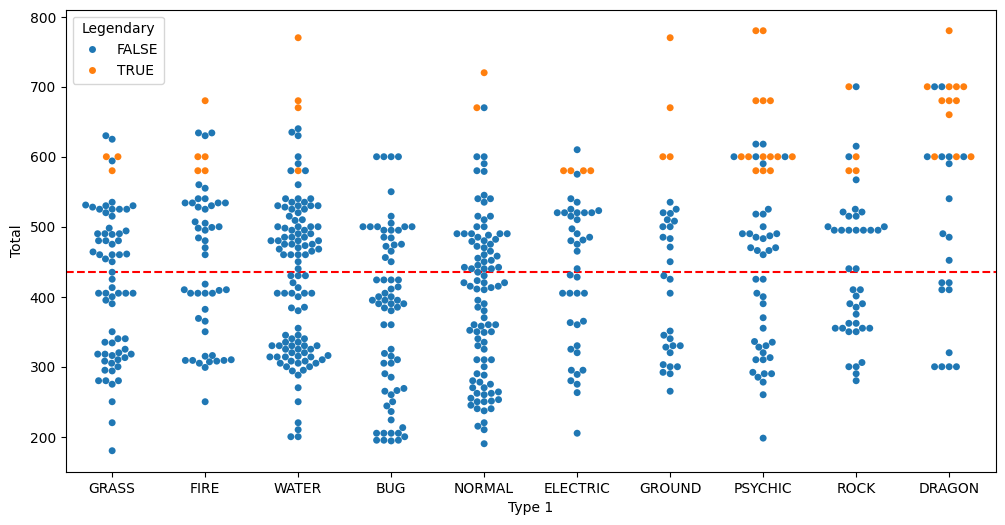

In [213]:
plt.figure(figsize=(12,6))
top_types=df['Type 1'].value_counts()[:10] 
df1=df[df['Type 1'].isin(top_types.index)] 
sns.swarmplot(x='Type 1',y='Total',data=df1,hue='Legendary') 

plt.axhline(df1['Total'].mean(),color='red',linestyle='dashed')
plt.show()